<a href="https://colab.research.google.com/github/esrayuzgec/PlantVillageDataSet-Detection/blob/main/plantDisase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esrayuzgec","key":"38d38662eddc4827ce5088ed6044748a"}'}

In [3]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d emmarex/plantdisease

 99% 652M/658M [00:17<00:00, 44.4MB/s]
100% 658M/658M [00:17<00:00, 39.2MB/s]


In [5]:
from zipfile import ZipFile
file_name="plantdisease.zip"

In [6]:
with ZipFile(file_name,'r') as zip:  #Zip halinde gelenn dosyayı  açtık
  zip.extractall()
  print('done')

done


In [7]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.8MB/s 
     |████████████████████████████████| 194kB 19.3MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 1.2MB 22.5MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 12.8MB 234kB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [8]:
from fastai.vision.all import *

In [9]:
path=Path("/content/PlantVillage")
path.ls()

(#15) [Path('/content/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite'),Path('/content/PlantVillage/Tomato_Septoria_leaf_spot'),Path('/content/PlantVillage/Tomato_healthy'),Path('/content/PlantVillage/Tomato_Bacterial_spot'),Path('/content/PlantVillage/Potato___Late_blight'),Path('/content/PlantVillage/Tomato_Early_blight'),Path('/content/PlantVillage/Potato___healthy'),Path('/content/PlantVillage/Potato___Early_blight'),Path('/content/PlantVillage/Pepper__bell___healthy'),Path('/content/PlantVillage/Tomato__Target_Spot')...]

In [10]:
item_tfms = RandomResizedCrop(256)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [11]:
plant = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.2),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )

In [12]:
dls = plant.dataloaders(path,bs=32)

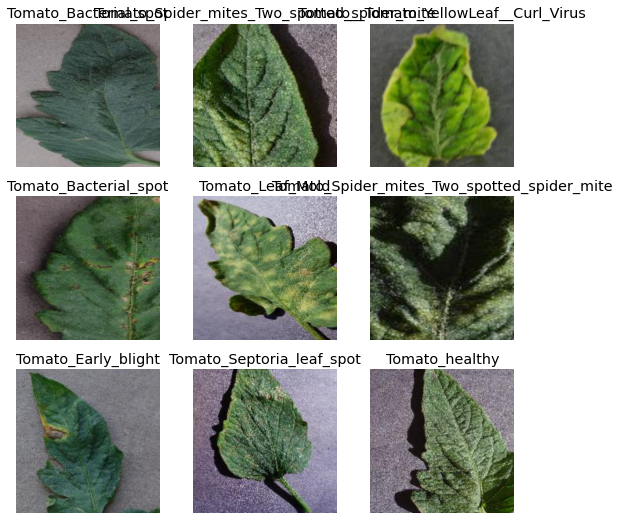

In [13]:
dls.show_batch(max_n=9,unique=False)

In [23]:
learn= cnn_learner(dls,resnet50, pretrained=True, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(lr_min=0.004786301031708717, lr_steep=0.002511886414140463)

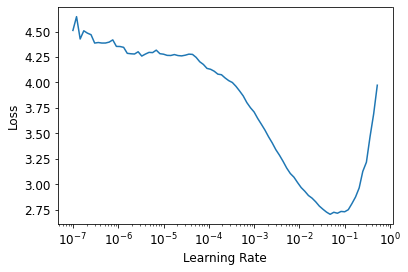

In [24]:
learn.lr_find()

In [25]:
learn.fine_tune(25,3.1e-2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.818535,0.453757,0.873758,0.126242,02:16


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.359364,0.183720,0.942331,0.057669,02:55
1,0.316437,0.236204,0.964623,0.035377,02:55
2,0.288022,0.067545,0.976739,0.023261,02:55
3,0.315557,1.067346,0.956385,0.043615,02:55
4,0.330799,0.137168,0.953962,0.046038,02:55
5,0.339096,0.703719,0.967046,0.032954,02:55
6,0.362875,5.253824,0.949843,0.050157,02:54
7,0.345099,0.082148,0.976254,0.023746,02:54
8,0.305438,0.302248,0.956869,0.043131,02:54
9,0.357698,36.948551,0.930943,0.069057,02:54


In [36]:
learn.summary()

Sequential (Input shape: 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 64 x 64  
Conv2d                                    16384      True      
BatchNorm2d                               512        True      
ReLU                                                           
__________________________________________

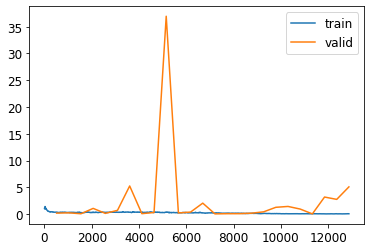

In [26]:
learn.recorder.plot_loss()

In [27]:
interp=ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/fastai/interpret.py:88: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


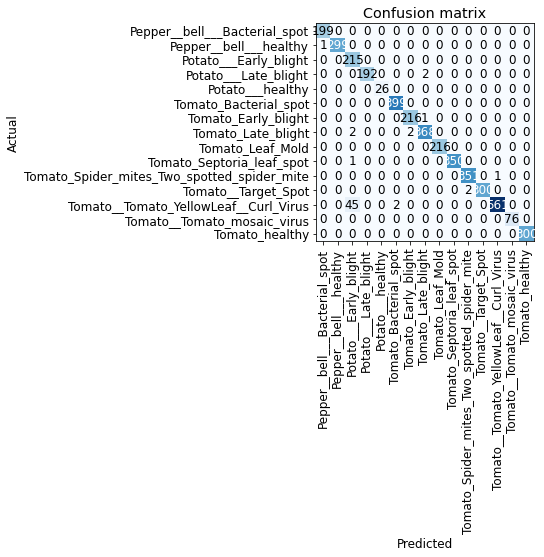

In [28]:
interp.plot_confusion_matrix()

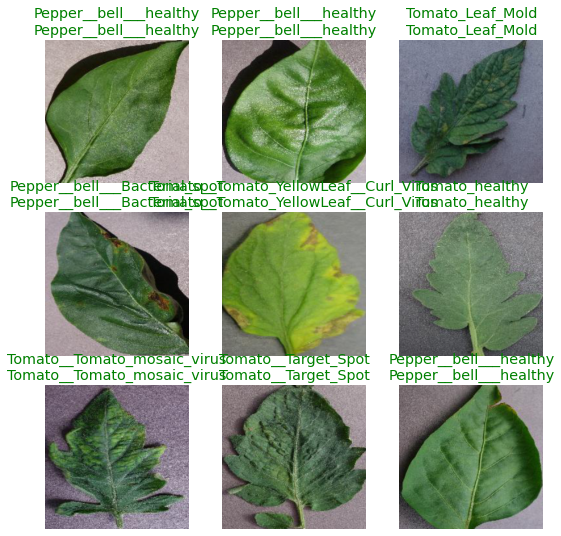

In [29]:
learn.show_results()

In [30]:

from fastai.vision.widgets import * 
from fastai.vision.all import *
from PIL import Image, ImageOps, ImageEnhance, __version__ as PILLOW_VERSION

In [31]:
btn_upload=widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

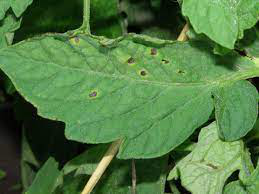

In [34]:
img=PILImage.create(btn_upload.data[-1])
img

In [35]:
learn.predict(img)[0]

'Tomato_Septoria_leaf_spot'